In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from sklearn.metrics import mean_squared_error
import datetime
from math import sqrt
from statistics import mean

In [51]:
df = pd.read_csv("energy consumption.csv")

In [52]:
df.head()

,DATE,ENERGY_INDEX
0,01/1939,3.3842
1,02/1939,3.4100
2,03/1939,3.4875
3,04/1939,3.5133
4,05/1939,3.5133


In [53]:
df.shape

(969, 2)

In [54]:
df.describe()

,ENERGY_INDEX
count,969.000000
mean,54.657608
std,35.455379
min,3.384200
25%,19.581700
50%,54.763700
75%,87.729300
max,128.907100


In [55]:
df.timestamp = pd.to_datetime(df['DATE'])
df.index=df.timestamp

<ipython-input-55-0bb86fe920ce>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.timestamp = pd.to_datetime(df['DATE'])


In [56]:
df.DATE.min()

'01/1939'

In [57]:
df.DATE.max()

'12/2018'

In [58]:
train_data=df[:590]
test_data=df[590:]

In [59]:
train_data.shape

(590, 2)

In [60]:
train_data.tail()

,DATE,ENERGY_INDEX
DATE,,
1987-10-01,10/1987,60.5402
1987-11-01,11/1987,62.6219
1987-12-01,12/1987,70.7671
1988-01-01,01/1988,80.0833
1988-02-01,02/1988,76.3631


In [61]:
test_data.shape

(379, 2)

In [62]:
test_data.tail()

,DATE,ENERGY_INDEX
DATE,,
2019-05-01,05/2019,91.9046
2019-06-01,06/2019,98.4397
2019-07-01,07/2019,112.9469
2019-08-01,08/2019,111.6645
2019-09-01,09/2019,102.2911


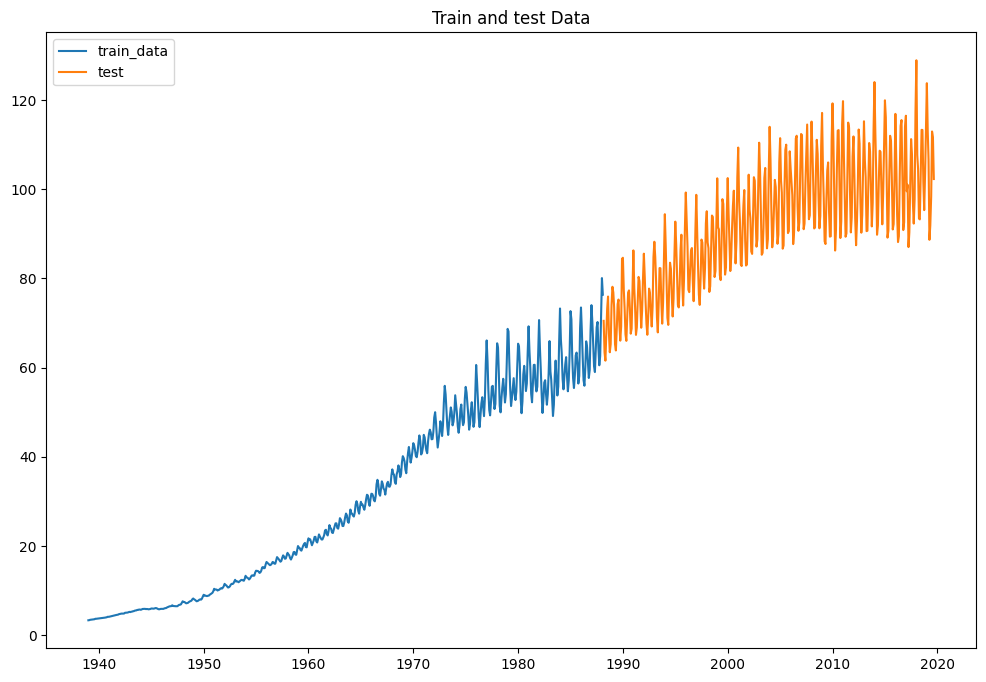

In [63]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(test_data.index,test_data['ENERGY_INDEX'], label='test')
plt.legend(loc='best')
plt.title("Train and test Data")
plt.show()

In [64]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [65]:
model = SimpleExpSmoothing(train_data['ENERGY_INDEX'])
model = model.fit()

test_data['SES'] = model.forecast(len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-65-b59196197ea7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['SES'] = model.forecast(len(test_data))


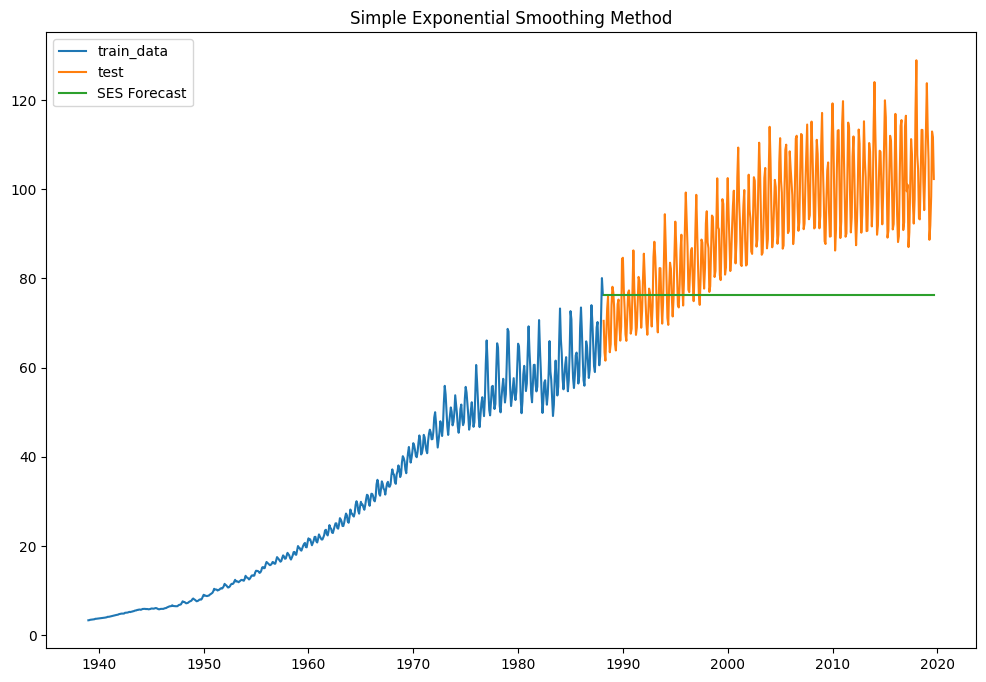

In [66]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(test_data.index,test_data['ENERGY_INDEX'], label='test')
plt.plot(test_data.index,test_data['SES'], label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [67]:
rmse = sqrt(mean_squared_error(test_data['ENERGY_INDEX'], test_data['SES']))
print('The RMSE value for Simple Exponential Smoothing Method is', rmse)

The RMSE value for Simple Exponential Smoothing Method is 21.016187954943874


In [68]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [69]:
model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']), trend='add')
model = model.fit() #

test_data['Holt_linear'] = model.forecast(len(test_data))

<ipython-input-69-103c79922b84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Holt_linear'] = model.forecast(len(test_data))


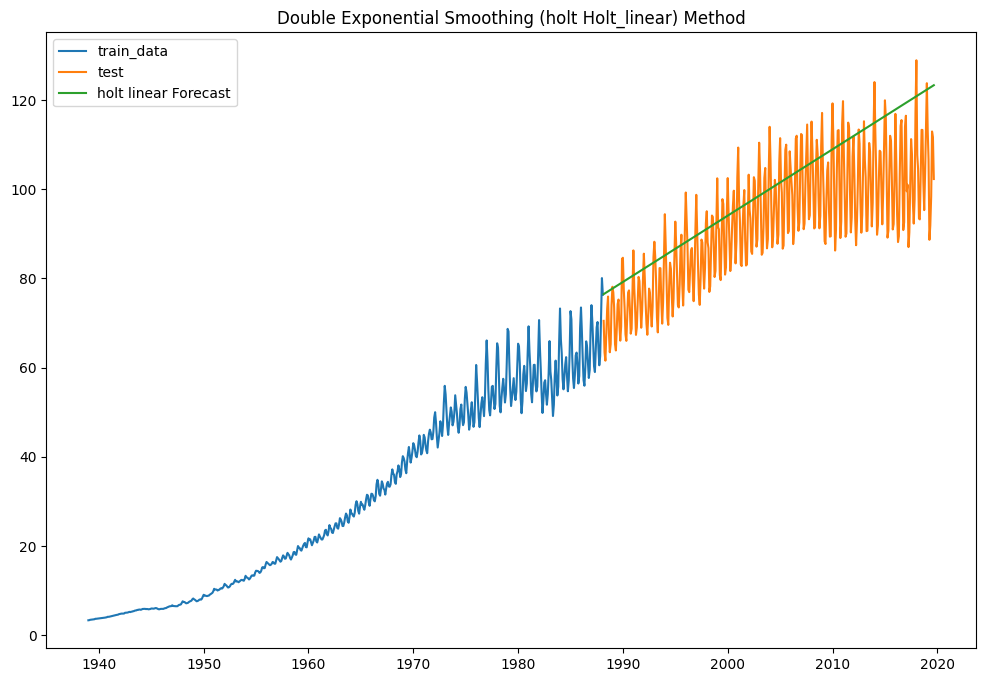

In [70]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(test_data.index,test_data['ENERGY_INDEX'], label='test')
plt.plot(test_data.index,test_data['Holt_linear'], label='holt linear Forecast')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing (holt Holt_linear) Method")
plt.show()

In [71]:
# calculating RMSE
rmse = sqrt(mean_squared_error(test_data['ENERGY_INDEX'], test_data['Holt_linear']))
print('The RMSE value for Holt Linear Method is', rmse)

The RMSE value for Holt Linear Method is 12.021097144156393


In [72]:
from statsmodels.tsa.api import ExponentialSmoothing

In [73]:
model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']) ,seasonal_periods=7 ,trend='add', seasonal='mul',)
fit1 = model.fit() #

test_data['Holt_Winter'] = fit1.forecast(len(test_data))

<ipython-input-73-7e47425f4770>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Holt_Winter'] = fit1.forecast(len(test_data))


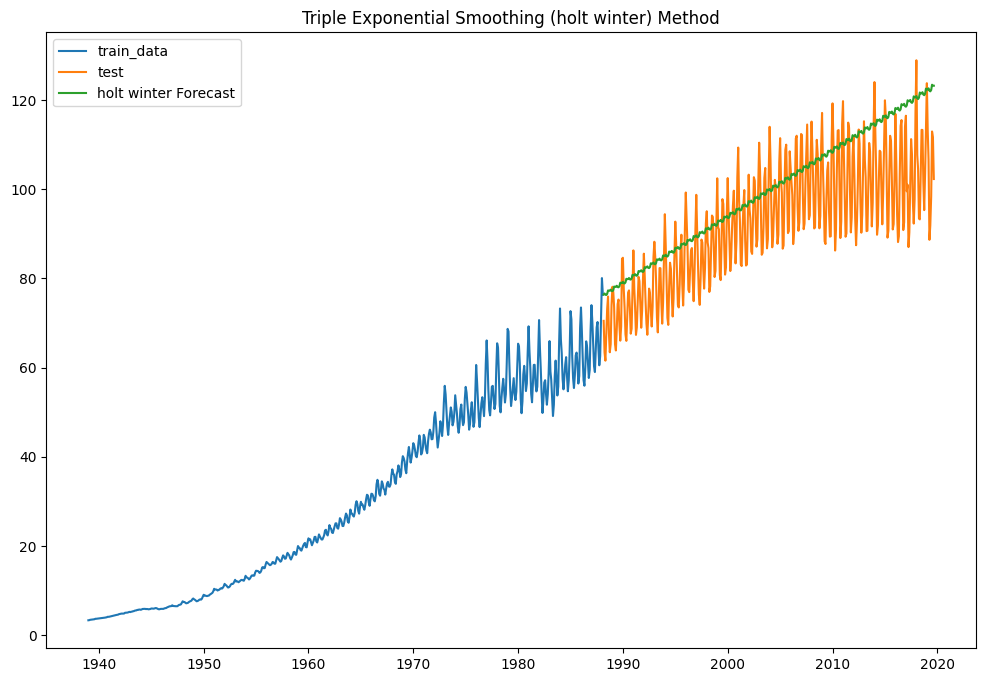

In [74]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(test_data.index,test_data['ENERGY_INDEX'], label='test')
plt.plot(test_data.index,test_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [75]:
# calculating RMSE
rmse = sqrt(mean_squared_error(test_data['ENERGY_INDEX'], test_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 11.871096753870695


In [76]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

In [77]:
def adf_test(timeseries):

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [78]:
adf_test(train_data['ENERGY_INDEX'])

Results of Dickey-Fuller Test:
Test Statistic                   1.422356
p-value                          0.997213
#Lags Used                      14.000000
Number of Observations Used    575.000000
Critical Value (1%)             -3.441774
Critical Value (5%)             -2.866580
Critical Value (10%)            -2.569454
dtype: float64


In [79]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [80]:
kpss_test(train_data['ENERGY_INDEX'])

Results of KPSS Test:
Test Statistic            3.558938
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-79-6e2183a16546>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [81]:
train_data['EI_diff'] = train_data['ENERGY_INDEX'] - train_data['ENERGY_INDEX'].shift(1)

<ipython-input-81-2a7cd1a81aaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['EI_diff'] = train_data['ENERGY_INDEX'] - train_data['ENERGY_INDEX'].shift(1)


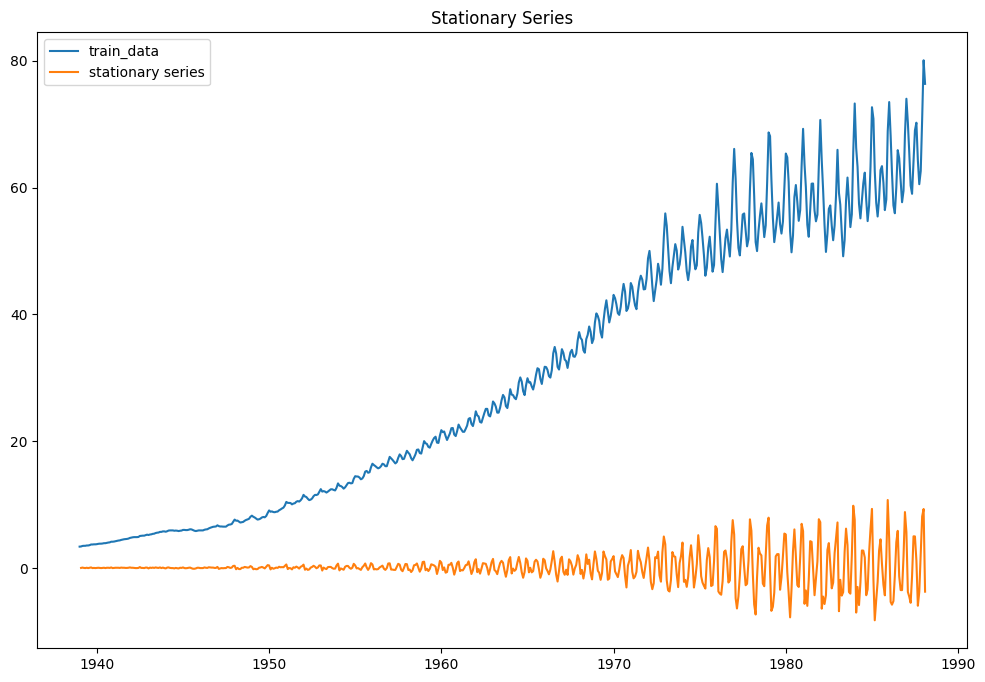

In [82]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(train_data.index,train_data['EI_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [83]:
train_data['EI_log'] = np.log(train_data['ENERGY_INDEX'])
train_data['EI_log_diff'] = train_data['EI_log'] - train_data['EI_log'].shift(1)

<ipython-input-83-e39f7cab27e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['EI_log'] = np.log(train_data['ENERGY_INDEX'])
<ipython-input-83-e39f7cab27e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['EI_log_diff'] = train_data['EI_log'] - train_data['EI_log'].shift(1)


In [84]:
test_data['EI_log'] = np.log(test_data['ENERGY_INDEX'])
test_data['EI_log_diff'] = test_data['EI_log'] - test_data['EI_log'].shift(1)

<ipython-input-84-0d59e3a08bf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['EI_log'] = np.log(test_data['ENERGY_INDEX'])
<ipython-input-84-0d59e3a08bf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['EI_log_diff'] = test_data['EI_log'] - test_data['EI_log'].shift(1)


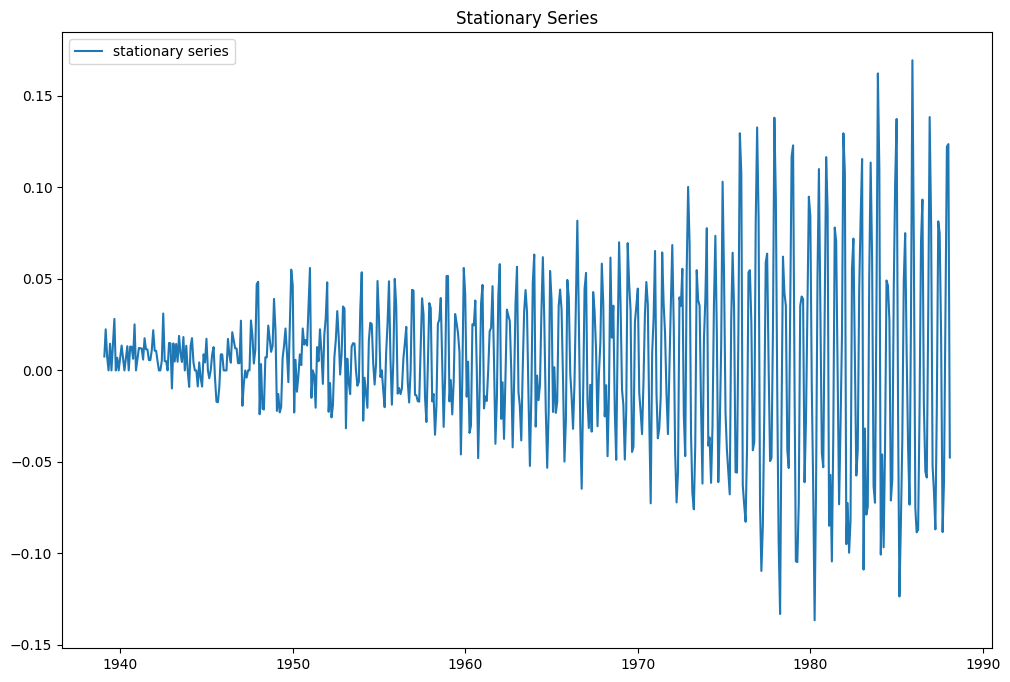

In [85]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['EI_log_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [86]:
adf_test(train_data['EI_log_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -4.896014
p-value                          0.000036
#Lags Used                      13.000000
Number of Observations Used    575.000000
Critical Value (1%)             -3.441774
Critical Value (5%)             -2.866580
Critical Value (10%)            -2.569454
dtype: float64


In [87]:
kpss_test(train_data['EI_log_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.660348
p-value                   0.017150
Lags Used                36.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

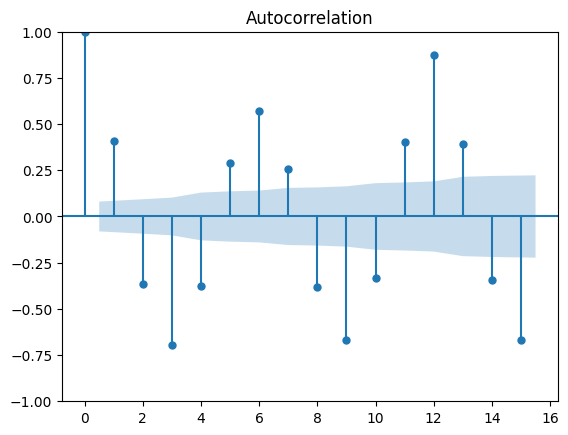

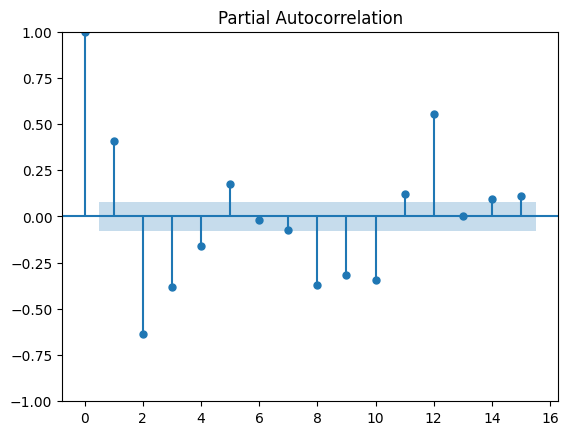

In [89]:
plot_acf(train_data['EI_log_diff'].dropna(), lags=15)
plot_pacf(train_data['EI_log_diff'].dropna(), lags=15)
plt.show()

In [90]:
from statsmodels.tsa.arima.model import ARIMA

In [91]:
# fit model
model = ARIMA(train_data['EI_log_diff'], order=(2,1,4))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
test_data.shape

(379, 7)

In [93]:
demand_forecast = model_fit.forecast(379)
out_put= pd.DataFrame(demand_forecast.values)

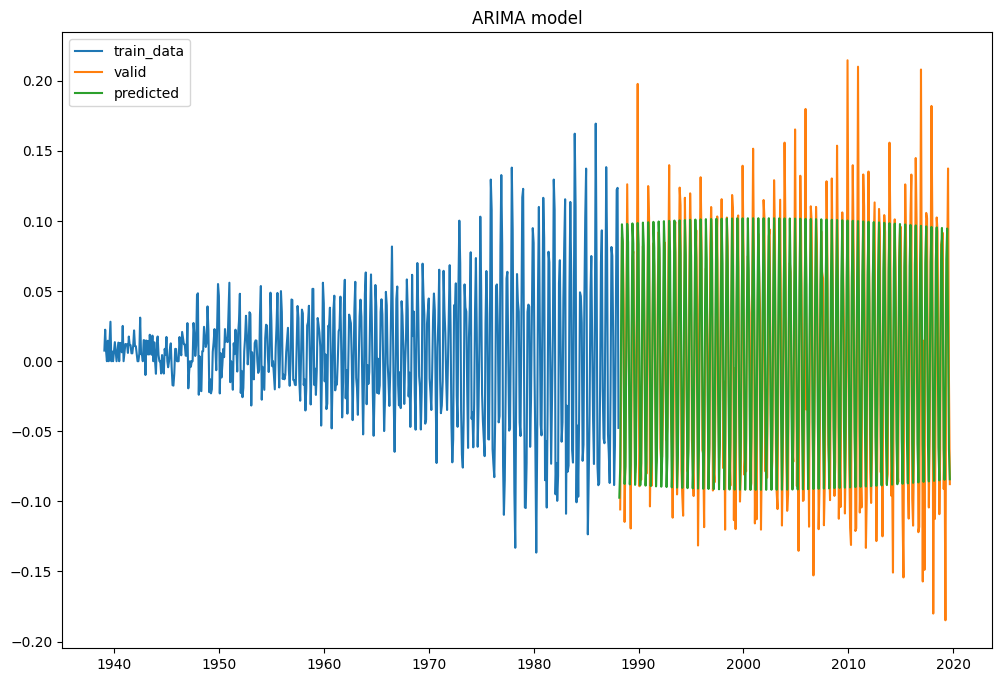

In [95]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['EI_log_diff'], label='train_data')
plt.plot(test_data.index, test_data['EI_log_diff'], label='valid')
plt.plot(test_data.index, out_put, label='predicted')

plt.legend(loc='best')
plt.title("ARIMA model")
plt.show()

In [102]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_data['EI_log'].dropna(),out_put))
print('The RMSE value for ARIMA is', rmse)

The RMSE value for ARIMA is 4.511348602940537


In [103]:
#SARIMAX

In [104]:
from statsmodels.tsa.statespace import sarimax

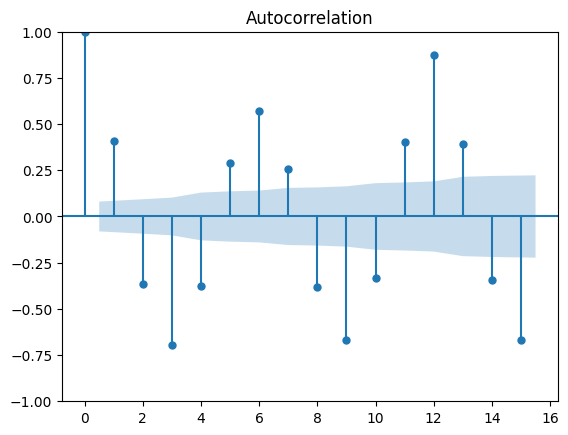

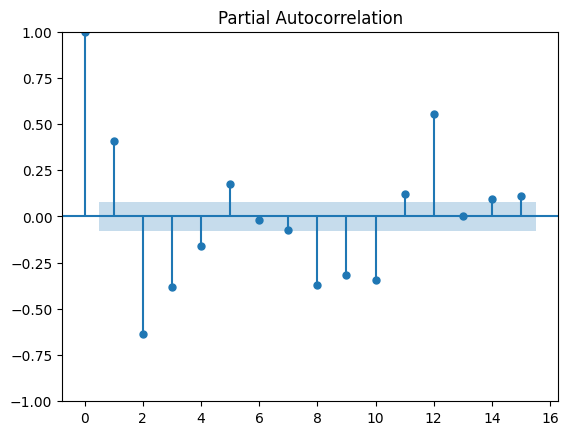

In [106]:
plot_acf(train_data['EI_log_diff'].dropna(), lags=15)
plot_pacf(train_data['EI_log_diff'].dropna(), lags=15)
plt.show()

In [111]:
# fit model
model = sarimax.SARIMAX(train_data['EI_log_diff'], seasonal_order=(2,1,1,7), order=(2,1,4))
fit1 = model.fit()

# make predictions
output= fit1.predict(211)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


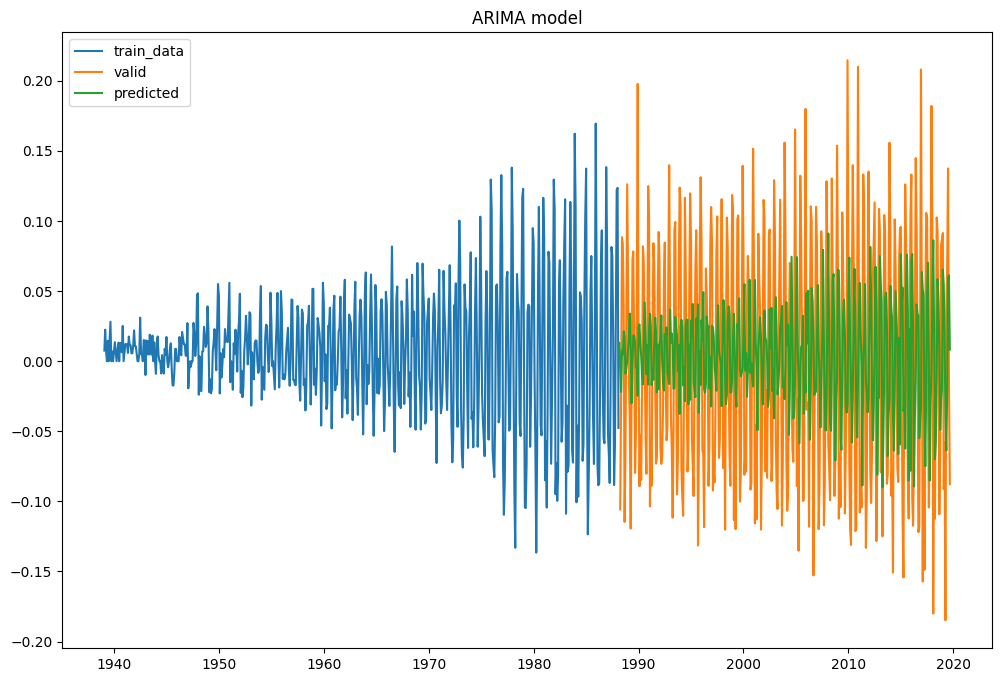

In [112]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['EI_log_diff'], label='train_data')
plt.plot(test_data.index, test_data['EI_log_diff'], label='valid')
plt.plot(test_data.index, output, label='predicted')

plt.legend(loc='best')
plt.title("ARIMA model")
plt.show()

In [114]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_data['EI_log'].dropna(),output))
print('The RMSE value for ARIMA is', rmse)

The RMSE value for ARIMA is 4.511379223673288
